# Testing the Move-to-Point Simulation

We'll make a basic simulator control loop (what the BRAIN trainer will do), and plot the output. Then we'll be able to use the same tools to visualize the learned policies.

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import math
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from bonsai_ai import Simulator, Config, Brain

In [5]:
import move_a_point_sim as sim

In [6]:
def run_sim_episode(sim, policy):
    """
    Given a sim and a policy, step through some iterations 
    of the simulator, returning the history of states.
    
    Args:
        sim: a PointSimulator
        policy: a function (SimState -> action dictionary)
    """
    k = 0 # Count steps, break out of infinite loops
    state_history = []
    reward_history = []
    state = sim.episode_start()
    state_history.append(state)

    is_terminal = False
    
    while not is_terminal:
        action = policy(state)
        # convert to a [-1,1] action
        #action['direction_radians'] = action['direction_radians'] / math.pi - 1.0
        (state, reward, is_terminal) = sim.simulate(action)
        state_history.append(state)
        reward_history.append(reward)
        k += 1
        if k > 1000:
            raise Exception("Simulation ran longer than 1000 steps. Stopping.")

    return state_history, reward_history

In [7]:
# Some silly policies
def random_policy(state):
    """
    Ignore the state, move randomly.
    """
    return {'direction_radians': random.random() * 2 * math.pi}

def go_up_policy(state):
    return {'direction_radians': math.pi / 2.0}

In [8]:
config = Config()
brain = Brain(config, "move-a-point")
point_sim = sim.PointBonsaiBridge(brain, "move_a_point_sim")

states, rewards = run_sim_episode(point_sim, random_policy)

In [9]:
states[0]

{'dx': 0.26103925029128017, 'dy': 0.36727222196687237}

In [10]:
def plot_state_history(states):
    target = states[0]['dx'], states[0]['dy']
    
    xs = [target[0] - s['dx'] for s in states]
    ys = [target[1] - s['dy'] for s in states]

    fig, axes = plt.subplots(1,1)
    #data = np.random.random([10, 2]) 
    
    # Pull out colors
    colors = np.linspace(0.1, 1, len(states))
    mymap = plt.get_cmap("Blues")
    # get the colors from the color map
    my_colors = mymap(colors)
    axes.scatter(xs, ys, s=40,
                     c=colors, edgecolors='None',
                     cmap=mymap)
    
    # Plot the target point in orange
    axes.scatter(target[0], target[1], s=40, c='orange', edgecolors='None')
    
    def bounds(lst):
        eps = 0.05
        return min(lst+[0])-eps, max(lst+[1])+eps
        
    axes.set_xlim(bounds(xs + [target[0]]))
    axes.set_ylim(bounds(ys + [target[1]]))
    

Initial distance: 0.179. Took 11 steps.
Initial distance: 0.165. Took 1 steps.


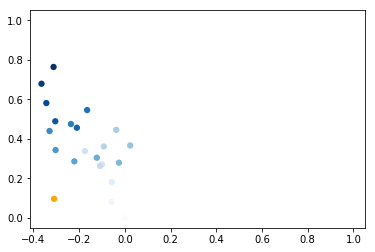

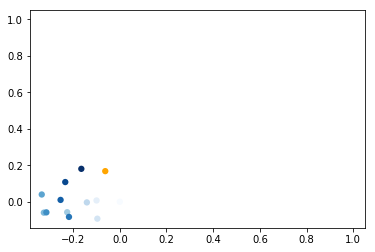

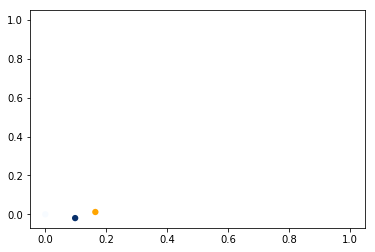

In [11]:
for i in range(3):
    states, rewards = run_sim_episode(point_sim, random_policy)
    plot_state_history(states)

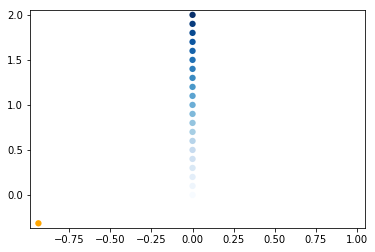

In [12]:
# Let's try the "go up" policy:
states, rewards = run_sim_episode(point_sim, go_up_policy)
plot_state_history(states)

In [13]:
states

[{'dx': -0.9384027684782403, 'dy': -0.31486318932123103},
 {'dx': -0.9384027684782403, 'dy': -0.414863189321231},
 {'dx': -0.9384027684782403, 'dy': -0.5148631893212311},
 {'dx': -0.9384027684782403, 'dy': -0.6148631893212312},
 {'dx': -0.9384027684782403, 'dy': -0.7148631893212313},
 {'dx': -0.9384027684782403, 'dy': -0.8148631893212314},
 {'dx': -0.9384027684782403, 'dy': -0.9148631893212315},
 {'dx': -0.9384027684782403, 'dy': -1.0148631893212317},
 {'dx': -0.9384027684782403, 'dy': -1.1148631893212317},
 {'dx': -0.9384027684782403, 'dy': -1.2148631893212318},
 {'dx': -0.9384027684782403, 'dy': -1.314863189321232},
 {'dx': -0.9384027684782403, 'dy': -1.414863189321232},
 {'dx': -0.9384027684782403, 'dy': -1.5148631893212317},
 {'dx': -0.9384027684782403, 'dy': -1.6148631893212317},
 {'dx': -0.9384027684782403, 'dy': -1.7148631893212318},
 {'dx': -0.9384027684782403, 'dy': -1.814863189321232},
 {'dx': -0.9384027684782403, 'dy': -1.914863189321232},
 {'dx': -0.9384027684782403, 'dy': 

In [14]:
rewards

[-1.7239942934744925,
 -1.8869812482742834,
 -2.0306477193708474,
 -2.1554940875735387,
 -2.2629354324180886,
 -2.354850853243623,
 -2.433255316061408,
 -2.500094894362487,
 -2.557138639046869,
 -2.605935394895841,
 -2.6478092827291846,
 -2.6838754436817416,
 -2.715064515243032,
 -2.742149253230272,
 -2.7657698981195935,
 -2.7864567778931306,
 -2.804649688458646,
 -2.820714127897256,
 -2.8349547012735012,
 0]

In [15]:
def near_optimal(state):
    dx, dy = state['dx'], state['dy']
    return {'direction_radians': math.atan2(dy, dx) % (2 * math.pi)}

Initial distance: 0.691. Took 6 steps.


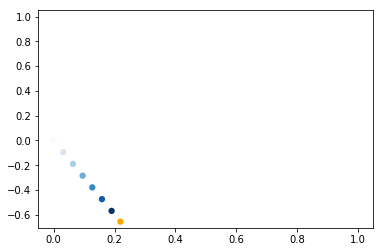

In [16]:
states, rewards = run_sim_episode(point_sim, near_optimal)
plot_state_history(states)

In [17]:
states

[{'dx': 0.21932069223985284, 'dy': -0.6555368451758861},
 {'dx': 0.18759268132096185, 'dy': -0.5607036583522285},
 {'dx': 0.15586467040207086, 'dy': -0.46587047152857086},
 {'dx': 0.12413665948317987, 'dy': -0.37103728470491326},
 {'dx': 0.09240864856428888, 'dy': -0.2762040978812557},
 {'dx': 0.060680637645397884, 'dy': -0.18137091105759817},
 {'dx': 0.02895262672650689, 'dy': -0.08653772423394063}]

In [18]:
rewards

[1.0000000000000018,
 1.0000000000000018,
 1.0000000000000004,
 1.0000000000000004,
 0.9999999999999996,
 14]

# Next step: RL!

Now it's time to go write some Inkling code to connect the simulator to a BRAIN. Then we'll train it.